## Задача
В базе данных нефтегазовых месторождений одной компании произошёл системный сбой и информация о типе месторождения по расположению (на берегу или в открытом море) была удалена. Так как эта информация крайне важна, вам необходимо восстановить её в пострадавшем датасете.
В качестве тренировочного датасета можете использовать неиспорченный датасет.
Входные данные: тренировочный датасет train.csv, в котором поля обозначают следующее:
Tectonic regime - тектонический режим месторождения
Onshore/Offshore - тип месторождения по расположению
Hydrocarbon type - тип углеводородов
Reservoir status - статус разработки месторождения
Structural setting - структурные особенности месторождения
Depth - средняя глубина кровли резервуара
Period - геологическая система образования резервуара
Lithology - основной литологический состав коллектора
Gross - среднее значение общей толщины резервуара
Netpay - среднее значение эффективной углеводородонасыщенной толщины коллектора Porosity - среднее значение матричной пористости Permeability - среднее значение проницаемости по воздуху.


## Подготовка данных

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [343]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [344]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tectonic regime     309 non-null    object 
 1   Onshore/Offshore    309 non-null    object 
 2   Hydrocarbon type    309 non-null    object 
 3   Reservoir status    309 non-null    object 
 4   Structural setting  309 non-null    object 
 5   Depth               309 non-null    int64  
 6   Period              309 non-null    object 
 7   Lithology           309 non-null    object 
 8   Gross               309 non-null    float64
 9   Netpay              309 non-null    float64
 10  Porosity            309 non-null    float64
 11  Permeability        309 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 29.1+ KB


- ectonic regime – тектонический режим месторождения
- Onshore/Oﬀshore – тип месторождения по расположению -> целевой признак
- Hydrocarbon type – тип углеводородов
- Reservoir status – статус разработки месторождения
- Structural setting – структурные особенности месторождения
- Depth – средняя глубина кровли резервуара
- Period – геологическая система образования резервуара
- Lithology – основной литологический состав коллектора
- Gross – среднее значение общей толщины резервуара
- Netpay – среднее значение эффективной углеводородонасыщенной толщины коллектора
- Porosity – среднее значение матричной пористости
- Permeability – среднее значение проницаемости по воздуху.

In [345]:
train.describe()

,Depth,Gross,Netpay,Porosity,Permeability
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,6726.242718,798.440129,204.166084,17.929709,463.048544
std,3506.266685,1329.172384,285.145971,7.644533,981.882456
min,220.000000,11.000000,0.000000,1.300000,0.010000
25%,3940.000000,145.000000,46.000000,12.000000,10.000000
50%,6580.000000,353.000000,118.000000,17.000000,90.000000
75%,9327.000000,790.000000,240.000000,24.000000,450.000000
max,18050.000000,10500.000000,2976.000000,55.000000,7500.000000


In [346]:
train.head()

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,OFFSHORE,OIL,DEVELOPING,INVERSION/WRENCH,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,GRAVITY/EXTENSION/EVAPORITE,OFFSHORE,OIL,MATURE PRODUCTION,SALT/PASSIVE MARGIN,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,GRAVITY/EXTENSION/EVAPORITE,ONSHORE,OIL,MATURE PRODUCTION,PASSIVE MARGIN,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,ONSHORE,OIL,DECLINING PRODUCTION,THRUST,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,ONSHORE,OIL,DECLINING PRODUCTION,INVERSION/RIFT,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0


In [347]:
train.columns

Index(['Tectonic regime', 'Onshore/Offshore', 'Hydrocarbon type',
       'Reservoir status', 'Structural setting', 'Depth', 'Period',
       'Lithology', 'Gross', 'Netpay', 'Porosity', 'Permeability'],
      dtype='object')

In [348]:
test.columns

Index(['Tectonic regime', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Period', 'Lithology', 'Gross', 'Netpay',
       'Porosity', 'Permeability'],
      dtype='object')

### Целевой признак

In [349]:
y = train['Onshore/Offshore']
X = train
del X['Onshore/Offshore']

In [350]:
y.value_counts()

ONSHORE             211
OFFSHORE             93
ONSHORE-OFFSHORE      5
Name: Onshore/Offshore, dtype: int64

Text(0.5, 1.0, 'Onshore/Offshore distribution')

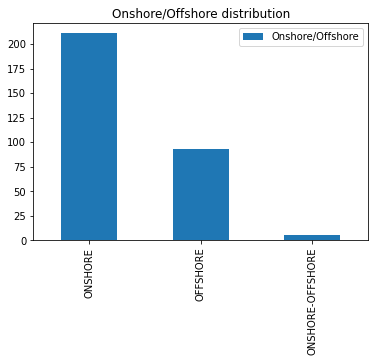

In [351]:
y.value_counts().plot(kind='bar', label='Onshore/Offshore')
plt.legend()
plt.title('Onshore/Offshore distribution')

### Признаки

- Вещественные: Depth, Gross, Netpay, Porosity, Permeability
- Категориальные: Tectonic regime, Hydrocarbon type, Reservoir status, Structural setting, Period, Lithology  

In [352]:
cat = ['Tectonic regime', 'Hydrocarbon type', 'Reservoir status', 
              'Structural setting', 'Period', 'Lithology'] 
real = ['Depth', 'Gross', 'Netpay', 'Porosity', 'Permeability']

In [353]:
train_real = X[real]
train_cat = X[cat]
test_real = test[real]
test_cat = test[cat]

<AxesSubplot:>

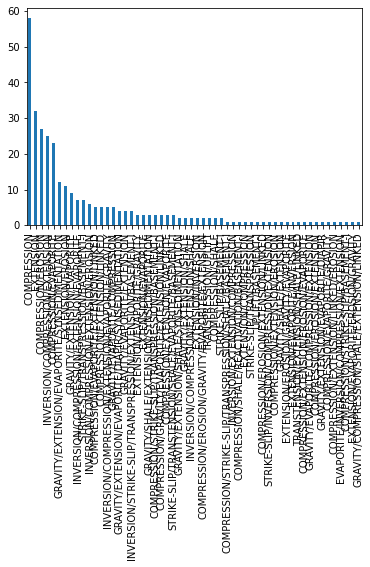

In [31]:
train_cat['Tectonic regime'].value_counts().plot(kind='bar')

<AxesSubplot:>

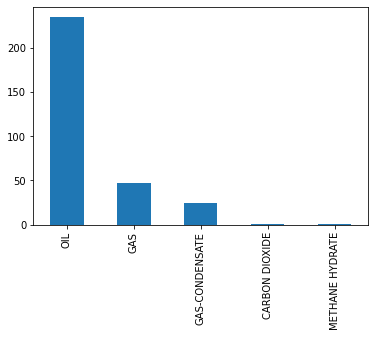

In [32]:
train_cat['Hydrocarbon type'].value_counts().plot(kind='bar')

<AxesSubplot:>

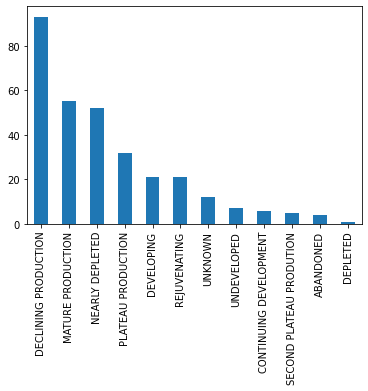

In [33]:
train_cat['Reservoir status'].value_counts().plot(kind='bar')

<AxesSubplot:>

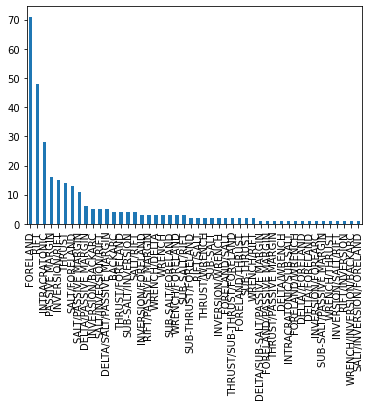

In [34]:
train_cat['Structural setting'].value_counts().plot(kind='bar')

<AxesSubplot:>

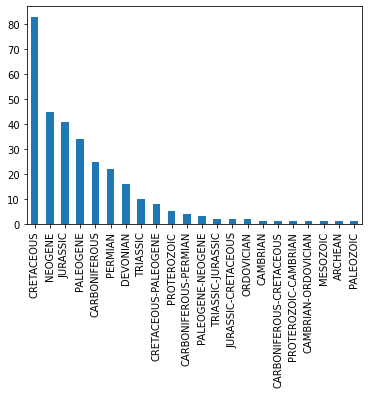

In [35]:
train_cat['Period'].value_counts().plot(kind='bar')

<AxesSubplot:>

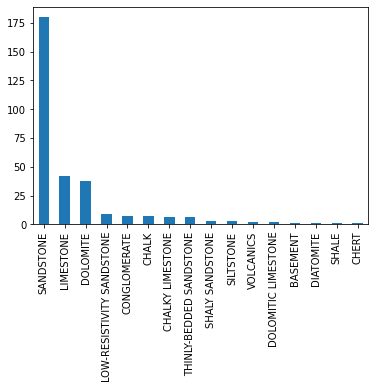

In [36]:
train_cat['Lithology'].value_counts().plot(kind='bar')

In [99]:
test_cat['Tectonic regime'].shape

(133,)

In [78]:
test_cat['Tectonic regime'].unique()

array(['COMPRESSION', 'INVERSION/COMPRESSION/EXTENSION/EROSION',
       'INVERSION/COMPRESSION/EXTENSION/EVAPORITE',
       'COMPRESSION/EVAPORITE/EXTENSION/LINKED', 'COMPRESSION/EROSION',
       'EXTENSION', 'INVERSION/COMPRESSION/EXTENSION',
       'GRAVITY/EXTENSION/EVAPORITE',
       'COMPRESSION/EROSION/EXTENSION/LINKED', 'COMPRESSION/EVAPORITE',
       'EXTENSION/EVAPORITE/EROSION/GRAVITY',
       'COMPRESSION/GRAVITY/EVAPORITE/EXTENSION/LINKED',
       'GRAVITY/EVAPORITE/COMPRESSION', 'COMPRESSION/SHALE',
       'EXTENSION/EROSION',
       'GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENTATION',
       'EXTENSION/EVAPORITE/INVERSION',
       'INVERSION/STRIKE-SLIP/TRANSPRESSION/EXTENSION/BASEMENT-I',
       'GRAVITY/EXTENSION/SHALE', 'STRIKE-SLIP/TRANSTENSION/BASEMENT-I',
       'EXTENSION/TRANSTENSION',
       'COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I',
       'COMPRESSION/EXTENSION', 'STRIKE-SLIP/TRANSPRESSION',
       'STRIKE-SLIP/TRANSPRESSION/BASEMENT-I',
       'INVE

In [133]:
# признаки которые надо разделять
cat_multi = [('Tectonic regime', '/'), ('Structural setting', '/'), ('Period', '-')]
# признаки в которых надо заменить значение
cat_single = [('Hydrocarbon type', 'BITUMEN'), ('Reservoir status', 'TEMPORARILY SHUT-IN'),
              ('Lithology', 'GLAUCONITIC SANDSTONE')]

In [97]:
for feature in cat:
    print(feature)
    print(pd.DataFrame(test_cat[feature].unique(), 
                       np.isin(test_cat[feature].unique(),
                               train_cat[feature].unique())))

Tectonic regime
                                                       0
True                                         COMPRESSION
True             INVERSION/COMPRESSION/EXTENSION/EROSION
True           INVERSION/COMPRESSION/EXTENSION/EVAPORITE
True              COMPRESSION/EVAPORITE/EXTENSION/LINKED
True                                 COMPRESSION/EROSION
True                                           EXTENSION
True                     INVERSION/COMPRESSION/EXTENSION
True                         GRAVITY/EXTENSION/EVAPORITE
True                COMPRESSION/EROSION/EXTENSION/LINKED
True                               COMPRESSION/EVAPORITE
True                 EXTENSION/EVAPORITE/EROSION/GRAVITY
True      COMPRESSION/GRAVITY/EVAPORITE/EXTENSION/LINKED
True                       GRAVITY/EVAPORITE/COMPRESSION
True                                   COMPRESSION/SHALE
True                                   EXTENSION/EROSION
True   GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENT...
True           

In [216]:
for feature in cat:
    print(feature)
    print(pd.DataFrame(train_cat[feature].unique(), 
                       np.isin(train_cat[feature].unique(),
                               test_cat[feature].unique())))

Tectonic regime
                                                       0
True                STRIKE-SLIP/TRANSPRESSION/BASEMENT-I
True                         GRAVITY/EXTENSION/EVAPORITE
True                                         COMPRESSION
True                     INVERSION/COMPRESSION/EXTENSION
False                    COMPRESSION/EXTENSION/EVAPORITE
True                                 COMPRESSION/EROSION
True              COMPRESSION/EVAPORITE/EXTENSION/LINKED
True                                   EXTENSION/EROSION
True   GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENT...
True                               COMPRESSION/EVAPORITE
True                                           EXTENSION
False                        GRAVITY/EVAPORITE/EXTENSION
True        GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION
False    COMPRESSION/EROSION/GRAVITY/EVAPORITE/EXTENSION
False                                EXTENSION/INVERSION
False           GRAVITY/SHALE/EXTENSION/SYNSEDIMENTATION
False          

In [66]:
for feature in cat:
    print('{} train: '.format(feature))
    print(train_cat[feature].value_counts())
    print('{} test: '.format(feature))
    print(test_cat[feature].value_counts())
    print(' ')

Tectonic regime train: 
COMPRESSION                                                 58
EXTENSION                                                   32
COMPRESSION/EROSION                                         27
INVERSION/COMPRESSION/EXTENSION                             25
COMPRESSION/EVAPORITE                                       23
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION                12
EXTENSION/EROSION                                           11
GRAVITY/EXTENSION/EVAPORITE                                  9
INVERSION/COMPRESSION/EXTENSION/EVAPORITE                    7
STRIKE-SLIP/TRANSPRESSION/BASEMENT-I                         7
INVERSION/COMPRESSION/EXTENSION/EROSION                      6
COMPRESSION/EVAPORITE/EXTENSION/LINKED                       5
COMPRESSION/EXTENSION/LINKED                                 5
INVERSION/COMPRESSION/EXTENSION/EVAPORITE/GRAVITY            5
GRAVITY/EVAPORITE/COMPRESSION                                5
GRAVITY/EXTENSION/EVAPORITE/DIA

In [126]:
# ф-ция для разбиения категориальных признаков

def partition_encoder(data, feature):
    n = data[feature].shape[0]
    arr_val = data[feature].unique()
    set_cat = set()
    
    for val in arr_val:
        val = list(val.split('/'))
        for st in val:
            set_cat.add(st)
        
    frame = pd.DataFrame({cat : np.zeros(n) for cat in set_cat})
    for cat in set_cat:
        for i in range(n):
            frame[cat][i] = int(cat in data[feature][i])
            
    return frame       
    

In [206]:
# трансформатор для категориальных признаков

class PartitionEncoder():
    def __init__(self, feature, delimit):
        self.set_cat = set()
        self.feature = feature
        self.delimit = delimit
        
    def fit(self, data):
        arr_val = data[self.feature].unique()
        for val in arr_val:
            val = list(val.split(self.delimit))
            for st in val:
                self.set_cat.add(st) 
                
    def transform(self, data):
        n = data[self.feature].shape[0]
        frame = pd.DataFrame({cat : np.zeros(n) for cat in self.set_cat})
        for cat in self.set_cat:
            for i in range(n):
                frame[cat][i] = int(cat in data[self.feature][i])
        del data[self.feature]
        data = data.merge(frame, left_index=True, right_index=True)
        return data

In [112]:
frame = partition_encoder(train_cat, 'Tectonic regime')

In [113]:
frame.head()

,BASEMENT-I,EVAPORITE,REACTIVATION,EROSION,INVERSION,SHALE,STRIKE-SLIP,UPLIFT,DIAPIR,TRANSPRESSION,TRANSTENSION,SYNSEDIMENTATION,COMPRESSION,LINKED,EXTENSION,GRAVITY
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [184]:
transformer = PartitionEncoder('Tectonic regime', '/')
transformer.fit(train_cat)
new_train_cat = transformer.transform(train_cat)

In [185]:
new_train_cat.head()

,Hydrocarbon type,Reservoir status,Structural setting,Period,Lithology,BASEMENT-I,EVAPORITE,REACTIVATION,EROSION,INVERSION,...,STRIKE-SLIP,UPLIFT,DIAPIR,TRANSPRESSION,TRANSTENSION,SYNSEDIMENTATION,COMPRESSION,LINKED,EXTENSION,GRAVITY
0,OIL,DEVELOPING,INVERSION/WRENCH,NEOGENE,SANDSTONE,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OIL,MATURE PRODUCTION,SALT/PASSIVE MARGIN,CRETACEOUS,LIMESTONE,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,OIL,MATURE PRODUCTION,PASSIVE MARGIN,CRETACEOUS,LIMESTONE,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,OIL,DECLINING PRODUCTION,THRUST,CRETACEOUS,SANDSTONE,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,OIL,DECLINING PRODUCTION,INVERSION/RIFT,CRETACEOUS,SANDSTONE,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [131]:
new_train_cat.columns

Index(['Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Period',
       'Lithology', 'BASEMENT-I', 'EVAPORITE', 'REACTIVATION', 'EROSION',
       'INVERSION', 'SHALE', 'STRIKE-SLIP', 'UPLIFT', 'DIAPIR',
       'TRANSPRESSION', 'TRANSTENSION', 'SYNSEDIMENTATION', 'COMPRESSION',
       'LINKED', 'EXTENSION', 'GRAVITY'],
      dtype='object')

In [130]:
new_test_cat = transformer.transform(test_cat)
new_test_cat.head()

,Hydrocarbon type,Reservoir status,Structural setting,Period,Lithology,BASEMENT-I,EVAPORITE,REACTIVATION,EROSION,INVERSION,...,STRIKE-SLIP,UPLIFT,DIAPIR,TRANSPRESSION,TRANSTENSION,SYNSEDIMENTATION,COMPRESSION,LINKED,EXTENSION,GRAVITY
0,GAS,MATURE PRODUCTION,FORELAND,PERMIAN,SANDSTONE,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,OIL,ABANDONED,FORELAND,PERMIAN,SANDSTONE,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,GAS,DECLINING PRODUCTION,INVERSION/RIFT,JURASSIC,DOLOMITE,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,OIL,DEVELOPING,THRUST,NEOGENE,SANDSTONE,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,GAS-CONDENSATE,MATURE PRODUCTION,FORELAND,CARBONIFEROUS,DOLOMITE,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Обработка вещественных признаков

<AxesSubplot:>

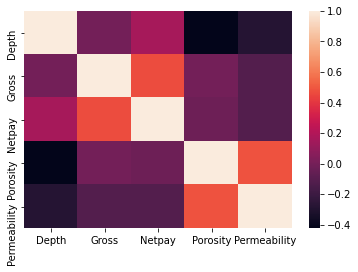

In [53]:
corr_matrix = train_real.corr()
sns.heatmap(corr_matrix)

array([[<AxesSubplot:title={'center':'Depth'}>,
        <AxesSubplot:title={'center':'Gross'}>],
       [<AxesSubplot:title={'center':'Netpay'}>,
        <AxesSubplot:title={'center':'Porosity'}>],
       [<AxesSubplot:title={'center':'Permeability'}>, <AxesSubplot:>]],
      dtype=object)

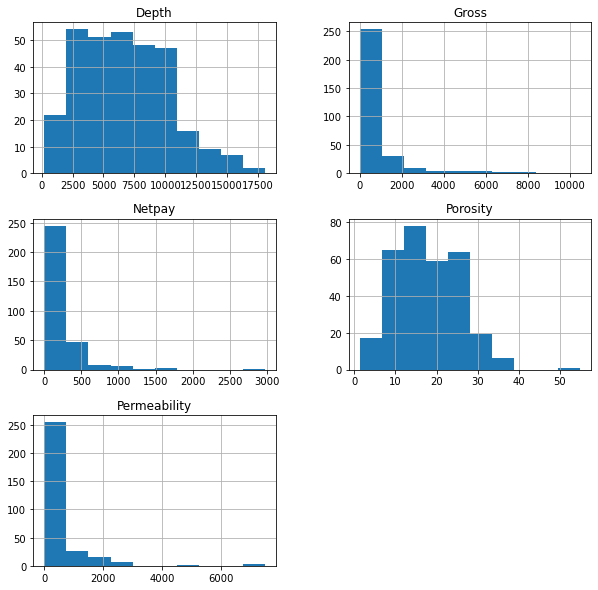

In [54]:
train_real.hist(figsize=(10,10))

In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_real)
train_real_new = scaler.transform(train_real)
test_real_new = scaler.transform(test_real)

In [266]:
train_real_new.shape

(309, 5)

In [267]:
test_real_new.shape

(133, 5)

### Обработка категориальных признаков

In [273]:
# признаки которые надо разделять
cat_multi = [('Tectonic regime', '/'), ('Structural setting', '/'), ('Period', '-')]
# признаки в которых надо заменить значение
cat_single = [('Hydrocarbon type', 'BITUMEN'), ('Reservoir status', 'TEMPORARILY SHUT-IN'),
              ('Lithology', 'GLAUCONITIC SANDSTONE')]

In [274]:
train_cat_multi = train_cat[['Tectonic regime', 'Structural setting', 'Period']]
test_cat_multi = test_cat[['Tectonic regime', 'Structural setting', 'Period']]

In [275]:
for feature, delimit in cat_multi:
    transformer = PartitionEncoder(feature, delimit)
    transformer.fit(train_cat_multi)
    train_cat_multi = transformer.transform(train_cat_multi)
    test_cat_multi = transformer.transform(test_cat_multi)
    
test_cat_multi.head()

,BASEMENT-I,EVAPORITE,REACTIVATION,EROSION,INVERSION_x,SHALE,STRIKE-SLIP,UPLIFT,DIAPIR,TRANSPRESSION,...,PROTEROZOIC,PERMIAN,MESOZOIC,NEOGENE,ARCHEAN,CAMBRIAN,PALEOGENE,DEVONIAN,JURASSIC,ORDOVICIAN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
test_cat_multi.to_numpy()
train_cat_multi.to_numpy()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [277]:
print(test_cat_multi.shape)
print(train_cat_multi.shape)

(133, 44)
(309, 44)


In [278]:
train_cat_single = train_cat[['Hydrocarbon type', 'Reservoir status', 'Lithology']]
test_cat_single = test_cat[['Hydrocarbon type', 'Reservoir status', 'Lithology']]

In [279]:
# заменим 'Hydrocarbon type', 'BITUMEN', 'OIL'

test_cat_single.replace('BITUMEN', 'OIL', inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [280]:
# заменим 'Reservoir status', 'TEMPORARILY SHUT-IN' на 'ABANDONED' в тесте
# 'DEPLETED' на NEARLY DEPLETED  в трейне

test_cat_single.replace('TEMPORARILY SHUT-IN', 'ABANDONED', inplace=True)
train_cat_single.replace('DEPLETED', 'NEARLY DEPLETED', inplace=True)

In [281]:
# заменим 'Lithology', 'GLAUCONITIC SANDSTONE', 'SANDSTONE'

test_cat_single.replace('GLAUCONITIC SANDSTONE', 'SANDSTONE', inplace=True)

In [282]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_cat_single)
train_cat_single = encoder.transform(train_cat_single).toarray()
test_cat_single = encoder.transform(test_cat_single).toarray()

In [283]:
train_cat_single.shape

(309, 32)

In [284]:
test_cat_single.shape

(133, 32)

### Объединим все

In [285]:
train_new = np.hstack((train_real_new, train_cat_multi, train_cat_single))
test_new = np.hstack((test_real_new, test_cat_multi, test_cat_single))

In [286]:
train_new.shape

(309, 81)

In [287]:
test_new.shape

(133, 81)

## Модели

## Логистическая ргрессия

In [289]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [290]:
classifier = LogisticRegression()
classifier.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [298]:
param_grid = {'C': np.arange(0.1, 1, 0.1),
              'penalty':['l1', 'l2'],}
cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
optimizer = GridSearchCV(classifier, param_grid, cv=cv)
optimizer.fit(train_new, y)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'penalty': ['l1', 'l2']})

In [299]:
print(optimizer.best_params_)
print(optimizer.best_score_)

{'C': 0.30000000000000004, 'penalty': 'l2'}
0.7849462365591396


In [307]:
result1 = optimizer.predict(test_new)
result1

array(['ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE', 'OFFSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE',
       'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE',
       'OFFSHORE', 'OFFSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE',
       'OFFSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE',
       'OFFSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'OFFSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSH

In [309]:
pd.DataFrame(result1).to_csv('ansver_1_log.csv', index=False, header=False)

In [306]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
log_classifier = LogisticRegression(C=0.3, penalty='l2')
score = make_scorer(roc_auc_score)
cross_val_score(log_classifier, train_new, y, cv=cv, scoring=score)

ValueError: could not convert string to float: 'ONSHORE'

In [ ]:
result1 = optimizer.predict(test_new)

## XGBoost

In [359]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [355]:
estimator = xgb.XGBClassifier(learning_rate=0.1, scoring='roc_auc')
param_grid = {'n_estimators': range(70, 90, 5),
              'max_depth':[10, 5, 30],
              'min_child_weight':range(1, 10, 2)}
optimizer = GridSearchCV(estimator, param_grid, cv=3, n_jobs=5)

In [356]:
optimizer.fit(train_new, y)

GridSearchCV(cv=3, estimator=XGBClassifier(scoring='roc_auc'), n_jobs=5,
             param_grid={'max_depth': [10, 5, 30],
                         'min_child_weight': range(1, 10, 2),
                         'n_estimators': range(70, 90, 5)})

In [360]:
print(optimizer.best_params_)
print(optimizer.best_score_)

{'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 70}
0.8187702265372168


In [362]:
accuracy_score(y, optimizer.predict(train_new))

0.9935275080906149

In [363]:
predict2 = pd.DataFrame(optimizer.predict(test_new))

In [364]:
result2 = optimizer.predict(test_new)
result2

array(['ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'OFFSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE', 'OFFSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE',
       'OFFSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE',
       'OFFSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'OFFSHORE', 'OFFSHORE', 'OFFSHORE', 'ONSHORE', 'OFFSHORE',
       'ONSHORE', 'OFFSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE', 'ONSHORE',
       'ONSHORE', 'ONSHORE', 'OFFSHORE', 'ONSHORE', 'ON

In [365]:
pd.DataFrame(result2).to_csv('ansver_xgb_2.csv', index=False, header=False)